In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform 

if platform.system() == 'Darwin':
  plt.rc('font', family = 'AppleGothic')
elif platform.system() == 'Darwin':
  plt.rc('font', family = 'Malgun Gothic')

df = pd.read_csv('data/@preprocessing_data_member01.csv')


<AxesSubplot:xlabel='최종주문요일', ylabel='count'>

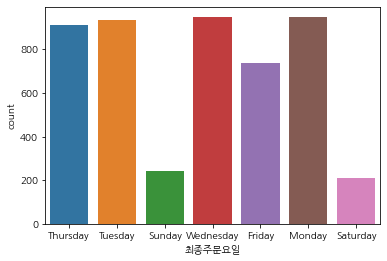

In [2]:
df = pd.read_csv('data/@preprocessing_data_member01.csv')
sns.countplot(x="최종주문요일",data= df)

<AxesSubplot:xlabel='최종주문요일', ylabel='count'>

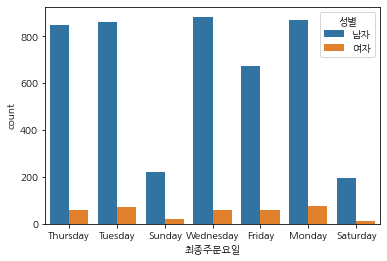

In [3]:
sns.countplot(x="최종주문요일",data=df,hue="성별")

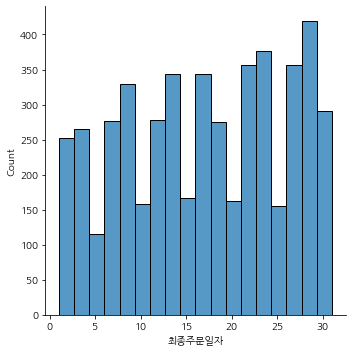

In [13]:
sns.displot(x="최종주문일자",data=df)

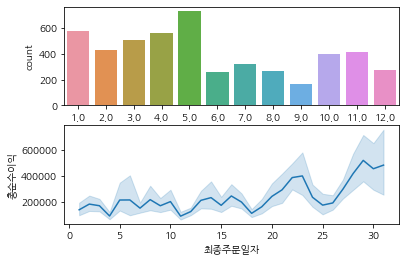

In [23]:
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)

ax1 = sns.countplot(x="가입월",data=df,ax=ax1)
ax2 = sns.lineplot(x="최종주문일자",y="총순수이익",data=df,ax=ax2)

<AxesSubplot:xlabel='최종주문일자', ylabel='총순수이익'>

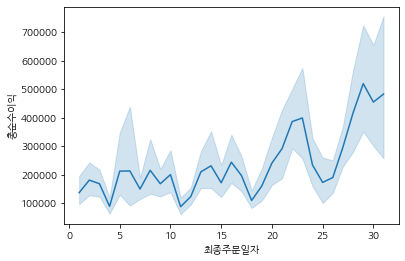

In [12]:
sns.lineplot(x="최종주문일자",y="총순수이익",data=df)

<AxesSubplot:xlabel='성별', ylabel='나이'>

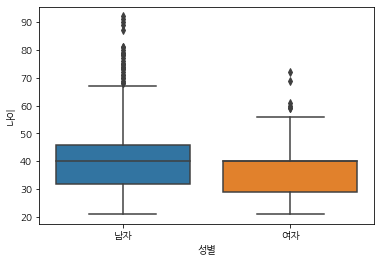

In [24]:
sns.boxplot(x="성별",y="나이",data=df)

In [26]:
df.columns

Index(['Unnamed: 0', 'ID', '총구매수량_x', '기타품목구매비율', '수저류구매비율', '실링구매비율',
       '용기류구매비율', '위생용품구매비율', '총구매횟수', '총판매액', '총할인금액', '총순수이익', '나이',
       '사용가능 적립금', '성별', '최종접속일', '최종주문일', '유입경로', '유입기기', '회원 가입일', '사업자구분',
       '회원구분', '지역', '세부지역', '주소', '최종주문일(clean)', '최종주문연도', '최종주문월', '최종주문일자',
       '최종주문요일', '최종주문시간', '회원가입일(clean)', '가입연도', '가입월', '가입일자', '가입요일'],
      dtype='object')

In [28]:
def extract_ad(input):
    output = input.split(" ")[0]
    return output

df["주소(시,도)"]=df["주소"].apply(extract_ad)

df["주소(시,도)"]

0         미확인
1       서울특별시
2       대구광역시
3         경기도
4        전라남도
        ...  
4919     충청남도
4920      경기도
4921      경기도
4922    부산광역시
4923    울산광역시
Name: 주소(시,도), Length: 4924, dtype: object

In [92]:
df["주소(시,도)"].apply(lambda x : x.split(" ")[0])

0         미확인
1       서울특별시
2       대구광역시
3         경기도
4        전라남도
        ...  
4919     충청남도
4920      경기도
4921      경기도
4922    부산광역시
4923    울산광역시
Name: 주소(시,도), Length: 4924, dtype: object

In [93]:
# sns.lineplot(x="주소(시,도)",y="총판매액",data=df)
df1 = df.pivot_table(index="주소(시,도)",values="총판매액",aggfunc=sum)
df1.reset_index(inplace=True)

<AxesSubplot:xlabel='주소(시,도)', ylabel='총판매액'>

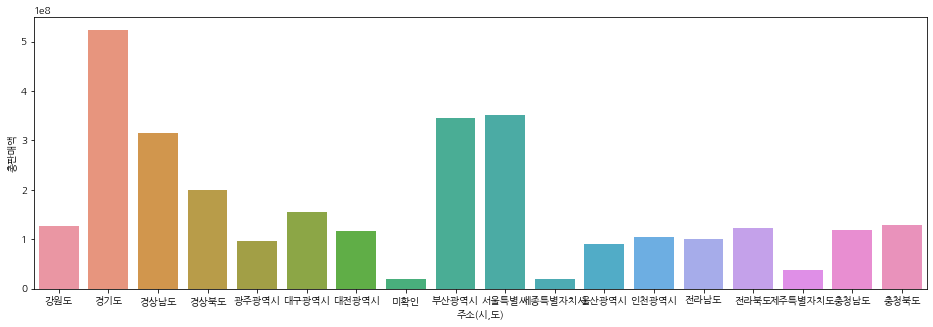

In [84]:
fig = plt.figure(figsize=(16,5))
sns.barplot(x="주소(시,도)",y="총판매액",data=df1)

In [116]:
Q1= df["총판매액"].describe().loc["25%"]
Q3= df["총판매액"].describe().loc["75%"]
df["총판매액"].quantile(0.25)
df["총판매액"].quantile(0.75)
# 

extract_data = df[(df["총판매액"]>=Q1)&(df["총판매액"]<= Q3)]
extract_data

,Unnamed: 0,ID,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,...,최종주문월,최종주문일자,최종주문요일,최종주문시간,회원가입일(clean),가입연도,가입월,가입일자,가입요일,"주소(시,도)"
0,0,100304734@n,1.0,0.000,0.000,0.0,1.000,0.000,1,103300,...,5.0,9.0,Thursday,14.0,2019-05-09 00:00:00,2019.0,5.0,9.0,Thursday,미확인
4,4,1004547839@k,4.0,1.000,0.000,0.0,0.000,0.000,1,360800,...,1.0,9.0,Wednesday,13.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday,전라남도
5,5,1004714862@k,2.0,0.000,0.000,0.0,1.000,0.000,2,108110,...,4.0,12.0,Friday,16.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday,세종특별자치시
6,6,10055065@n,4.0,0.000,0.000,0.0,0.750,0.250,1,200480,...,10.0,22.0,Monday,16.0,2018-10-22 00:00:00,2018.0,10.0,22.0,Monday,대구광역시
8,8,1005861444@k,3.0,0.000,0.000,0.0,1.000,0.000,1,225070,...,1.0,11.0,Friday,15.0,2019-01-11 00:00:00,2019.0,1.0,11.0,Friday,전라남도
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4914,4926,zlbearlz,1.0,1.000,0.000,0.0,0.000,0.000,1,138910,...,5.0,5.0,Saturday,21.0,2018-05-05 00:00:00,2018.0,5.0,5.0,Saturday,인천광역시
4915,4927,zltm0110,5.0,0.000,0.000,0.0,1.000,0.000,1,387960,...,2.0,26.0,Tuesday,21.0,2019-02-01 00:00:00,2019.0,2.0,1.0,Friday,충청남도
4917,4929,zoo71h,4.0,0.000,0.000,0.0,0.500,0.500,2,174670,...,4.0,15.0,Monday,10.0,2019-03-19 00:00:00,2019.0,3.0,19.0,Tuesday,경기도
4918,4930,zuingong73,12.0,0.000,0.167,0.0,0.417,0.417,5,464670,...,1.0,29.0,Tuesday,16.0,2018-08-15 00:00:00,2018.0,8.0,15.0,Wednesday,서울특별시
